<div>
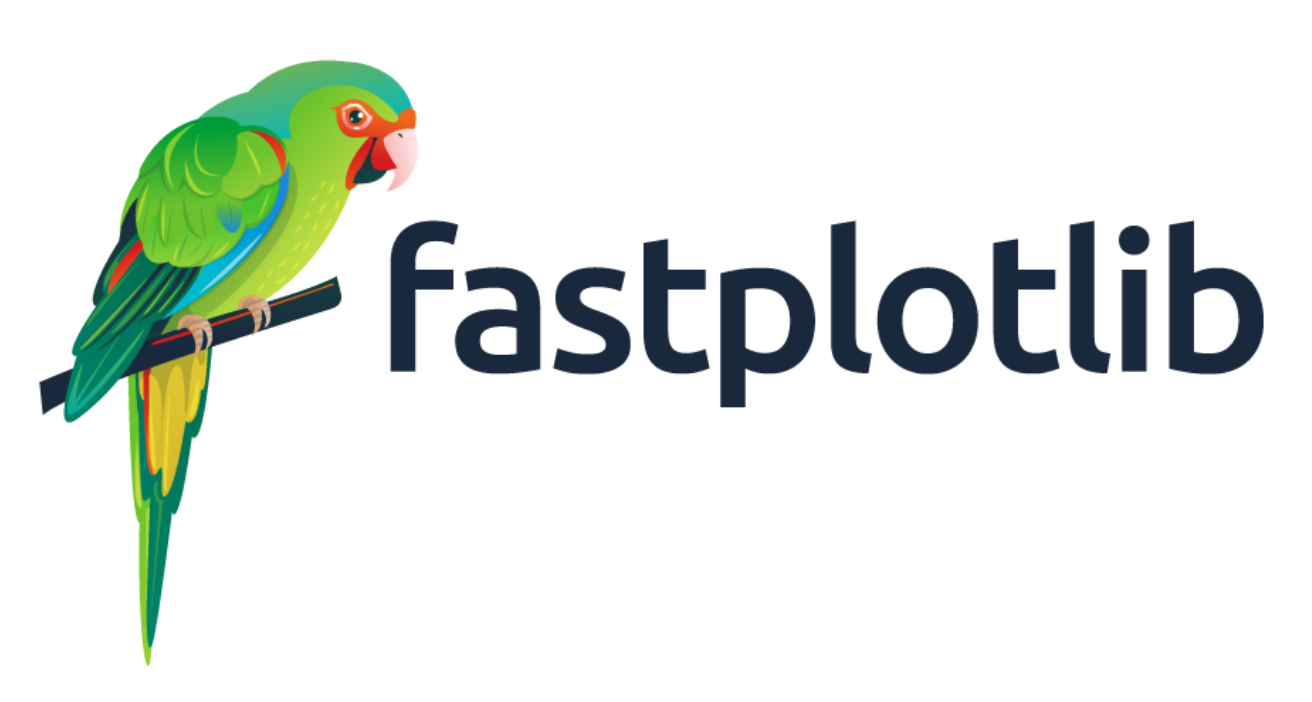
</div>

# Introduction to `fastplotlib`

## `fastplotlib` API

### 1. Graphics - objects that are drawn
- `Image`, `Line`, `Scatter`, `Heatmap`
- Collections - `LineCollection`, `LineStack` (ex: neural timeseries data)
- Interactions

### 2. Layouts
- `Plot` - a single plot area
- `GridPlot` - a grid of `Subplots`

### 3. Widgets - high level widgets to make repetitive UIs easier
- `ImageWidget`- widget for `Image` data with dims: `xy`, `txy`, `tzxy`
- Sliders, support window functions, etc.

This notebook will go through some basic components of the `fastplotlib` API including how to instantiate a plot, add graphics to a plot, and subsequently interact with the plot. 

**The example images are from imageio so you will need to install it for this example notebook. But imageio is not required to use fasptlotlib**

In [1]:
import imageio.v3 as iio

In [2]:
import fastplotlib as fpl
import numpy as np

## Simple image

In [3]:
# create a `Plot` instance
plot = fpl.Plot(size=(600, 500))

# get a grayscale image
data = iio.imread("imageio:camera.png")

# plot the image data
image_graphic = plot.add_image(data=data, name="sample-image")

plot.show(sidecar=True)

RFBOutputContext()

No config found!
No config found!


JupyterOutputContext(children=(JupyterWgpuCanvas(css_height='500px', css_width='600px'), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-down', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record')))))

**Use the handle on the bottom right corner of the canvas to resize it. You can also pan and zoom using your mouse!**

Changing graphic **"features"**

In [4]:
image_graphic.cmap = "viridis"

### Slicing data

**Most features, such as data, support slicing!**

Our image data is of shape [n_rows, n_columns]

In [5]:
image_graphic.data[::15, :] = 1
image_graphic.data[:, ::15] = 1

**Fancy indexing**

In [6]:
image_graphic.data[data > 175] = 255

**Adjust vmin vmax**

In [7]:
image_graphic.cmap.vmin = 50
image_graphic.cmap.vmax = 150

In [8]:
image_graphic.cmap.reset_vmin_vmax()

In [9]:
# close the plot
plot.close()

### Image updates

This examples show how you can define animation functions that run on every render cycle.

In [10]:
# create another `Plot` instance
plot_v = fpl.Plot(size=(600, 500))

plot.canvas.max_buffered_frames = 1

# make some random data again
data = np.random.rand(512, 512)

# plot the data
plot_v.add_image(data=data, name="random-image")

# a function to update the image_graphic
# a plot will pass its plot instance to the animation function as an arugment
def update_data(plot_instance):
    new_data = np.random.rand(512, 512)
    plot_instance["random-image"].data = new_data

#add this as an animation function
plot_v.add_animations(update_data)

plot_v.show(sidecar=True)

RFBOutputContext()

/home/clewis7/repos/fastplotlib/fastplotlib/graphics/_features/_base.py:34: UserWarning: converting float64 array to float32
  warn(f"converting {array.dtype} array to float32")


JupyterOutputContext(children=(JupyterWgpuCanvas(css_height='500px', css_width='600px'), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-down', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record')))))

In [11]:
plot_v.close()

## 2D line plots

This example plots a sine wave, cosine wave, and ricker wavelet and demonstrates how Graphic Features can be modified by slicing!

### First generate some data.

In [12]:
# linspace, create 100 evenly spaced x values from -10 to 10
xs = np.linspace(-10, 10, 100)
# sine wave
ys = np.sin(xs)
sine = np.dstack([xs, ys])[0]

# cosine wave
ys = np.cos(xs) + 5
cosine = np.dstack([xs, ys])[0]

# sinc function
a = 0.5
ys = np.sinc(xs) * 3 + 8
sinc = np.dstack([xs, ys])[0]

### We will plot all of it on the same plot. Each line plot will be an individual Graphic, you can have any combination of graphics on a plot.

In [13]:
# Create a plot instance
plot_l = fpl.Plot(size=(600, 300))

# plot sine wave, use a single color
sine_graphic = plot_l.add_line(data=sine, thickness=5, colors="magenta", name="sine")

# you can also use colormaps for lines!
cosine_graphic = plot_l.add_line(data=cosine, thickness=12, cmap="autumn", name="cosine")

# or a list of colors for each datapoint
colors = ["r"] * 25 + ["purple"] * 25 + ["y"] * 25 + ["b"] * 25
sinc_graphic = plot_l.add_line(data=sinc, thickness=5, colors = colors, name="sinc")

plot_l.show(sidecar=True)

RFBOutputContext()

JupyterOutputContext(children=(JupyterWgpuCanvas(css_width='600px'), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-up', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record')))))

### Graphic features support slicing! :D

In [14]:
# indexing of colors
cosine_graphic.colors[:40] = "cyan"

### colormaps

In [15]:
# set cmap 
plot_l["sine"].cmap = "jet"

In [16]:
# map cmap values
plot_l["sine"].cmap.values = cosine[:, 1]

In [17]:
plot_l.close()

## `ImageWidget` using 10GB zebrafish whole-brain data

In [18]:
import tifffile

In [19]:
# lazy load in zebrafish data
movie = tifffile.memmap('/home/clewis7/repos/fastplotlib-scipy2023/fpl-scipy2023-data/neural_data/zfish_vol.tiff')

In [20]:
movie.shape

(1309, 30, 512, 512)

### View each plane in a separate subplot

In [21]:
# get a list of txy arrays for each plane
planes = [movie[:, i] for i in range(movie.shape[1])]

iw = fpl.ImageWidget(
    data=planes,
    grid_plot_kwargs={"size": (600, 500), "controllers": "sync"},
    cmap="gnuplot2",
    histogram_widget=False
)

iw.show(sidecar=True)

RFBOutputContext()

JupyterOutputContext(children=(JupyterWgpuCanvas(css_height='500px', css_width='600px'), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-down', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record'), Dropdown(description='Subplots:', layout=Layout(width='200px'), options=('(0, 0)', '(0, 1)', '(0, 2)', '(0, 3

In [22]:
for subplot in iw.gridplot:
    subplot["image_widget_managed"].cmap.vmin = -0.12
    subplot["image_widget_managed"].cmap.vmax = 2.3

### Play with setting different window functions

These can also be given as kwargs to ImageWidget during instantiation

In [23]:
# must be in the form of {dim: (func, window_size)}
iw.window_funcs = {"t": (np.mean, 3)}

In [24]:
iw.close()

## Plots can also easily be made in Qt :D

In [ ]:
%gui qt

In [ ]:
iw = fpl.ImageWidget(
    data=planes,
    grid_plot_kwargs={"size": (600, 500), "controllers": "sync"},
    cmap="gnuplot2",
    histogram_widget=False
)

iw.show()

#### Can interact with subplots and graphics just as above!

In [ ]:
for subplot in iw.gridplot:
    subplot["image_widget_managed"].cmap.vmin = -0.12
    subplot["image_widget_managed"].cmap.vmax = 2.3

In [ ]:
# must be in the form of {dim: (func, window_size)}
iw.window_funcs = {"t": (np.mean, 3)}

In [44]:
iw.close()

## Check out the `fastplotlib` repo for more introductory examples:
- #### Repo: https://github.com/fastplotlib/fastplotlib
- #### Examples: https://github.com/fastplotlib/fastplotlib/tree/main/examples/notebooks

## For a more diverse set of demos, please see our talk from SciPy 2023:

- #### Repo: https://github.com/fastplotlib/fastplotlib-scipy2023

- #### Talk: https://www.youtube.com/watch?v=Q-UJpAqljsU